In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 105.6 MB/s eta 0:00:00


In [2]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [3]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

In [ ]:
# Task 1

H |0> = [0.707 0.707]
H |1> = [ 0.707 -0.707]
H |+> = [1. 0.]
H |-> = [0. 1.]
--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


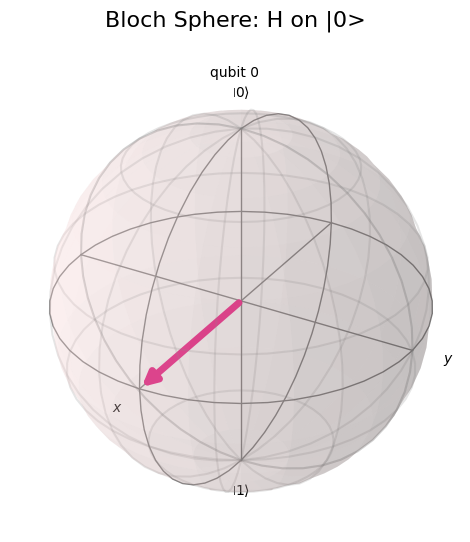

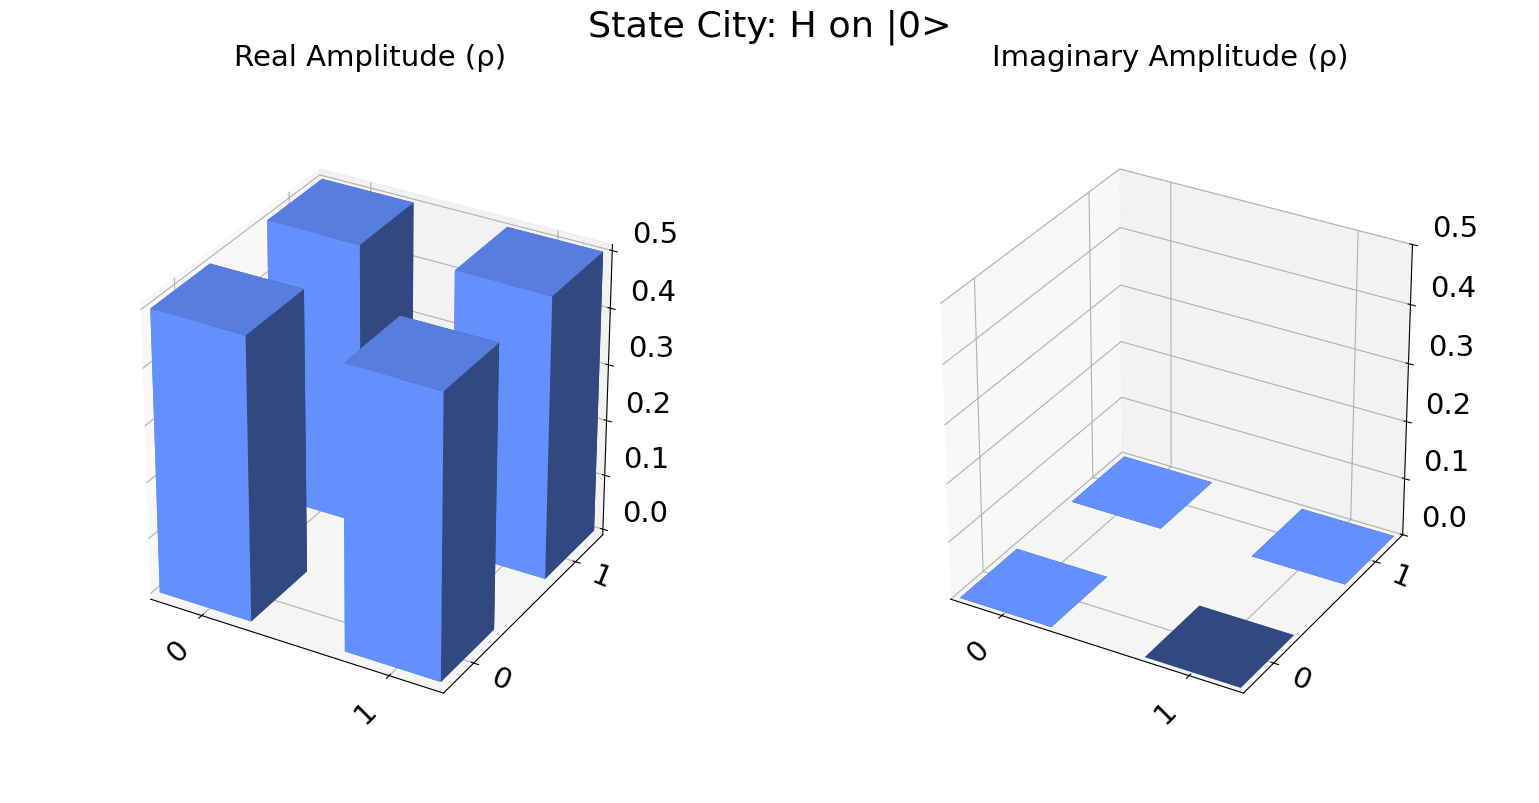

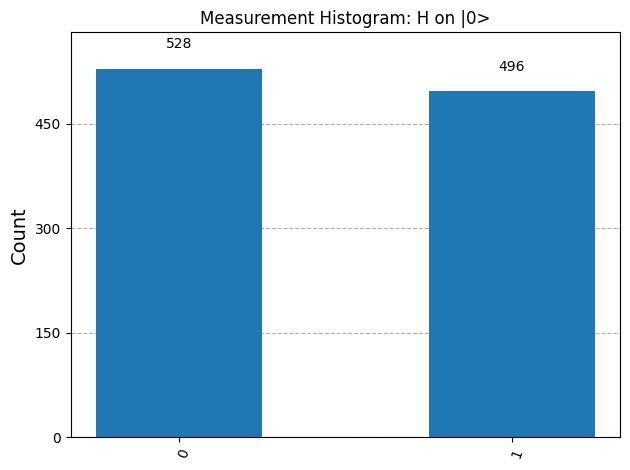



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


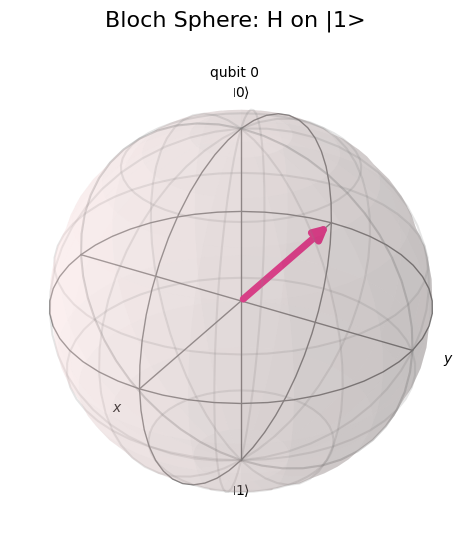

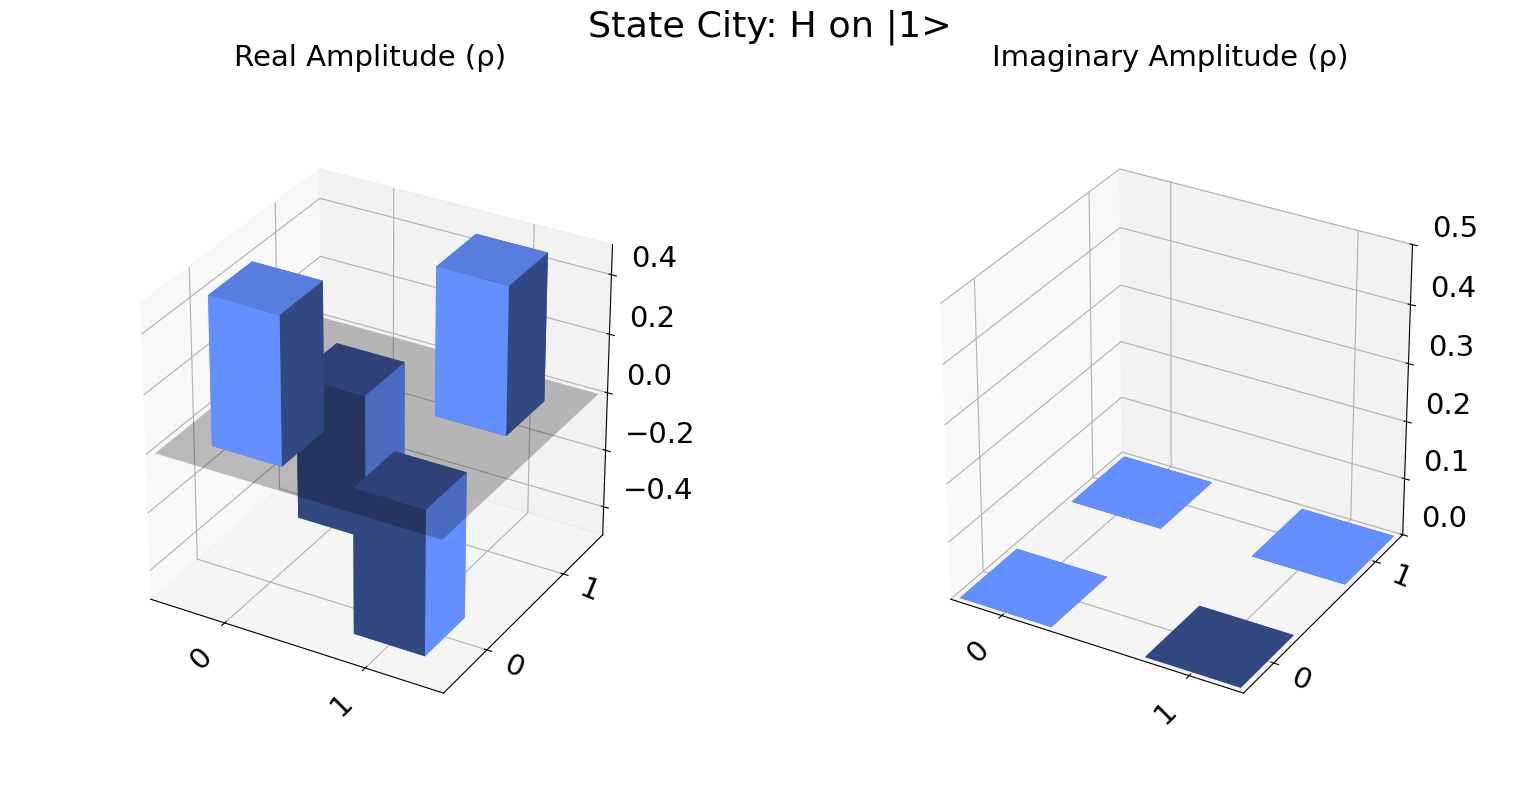

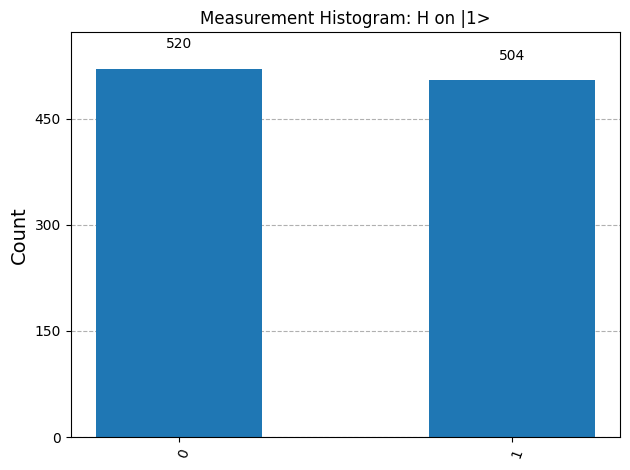



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


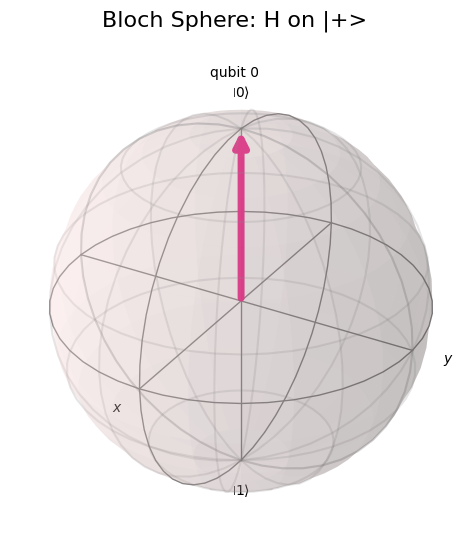

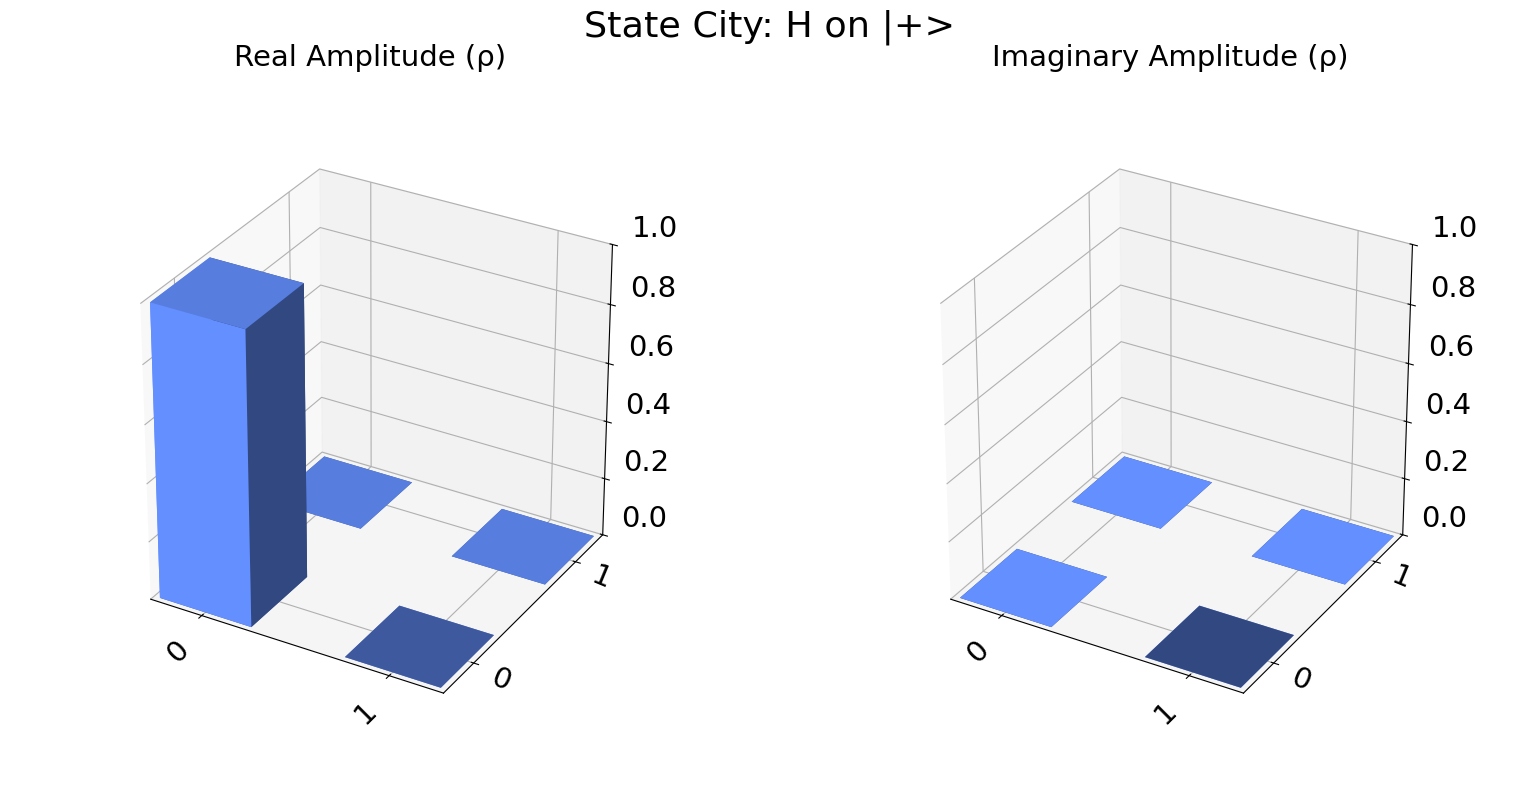

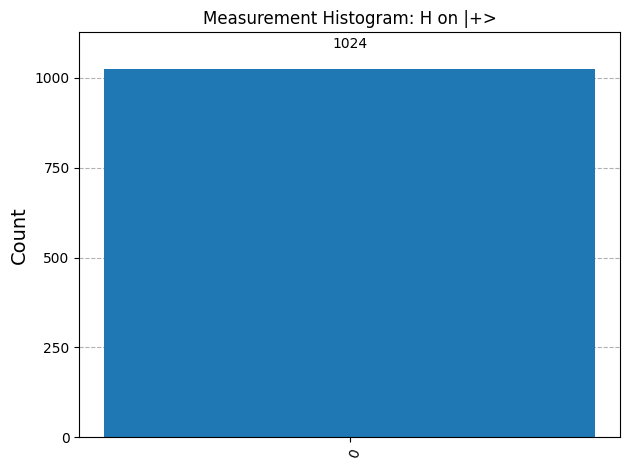



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


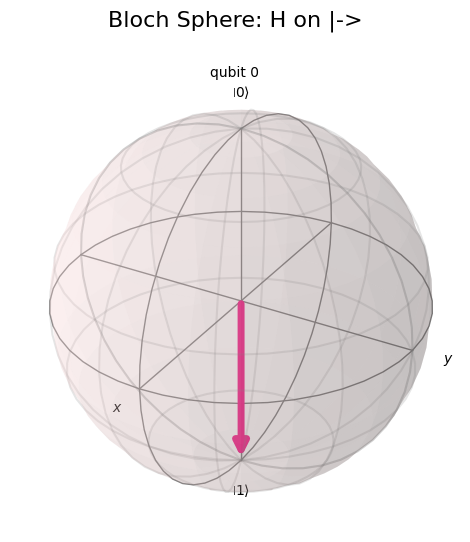

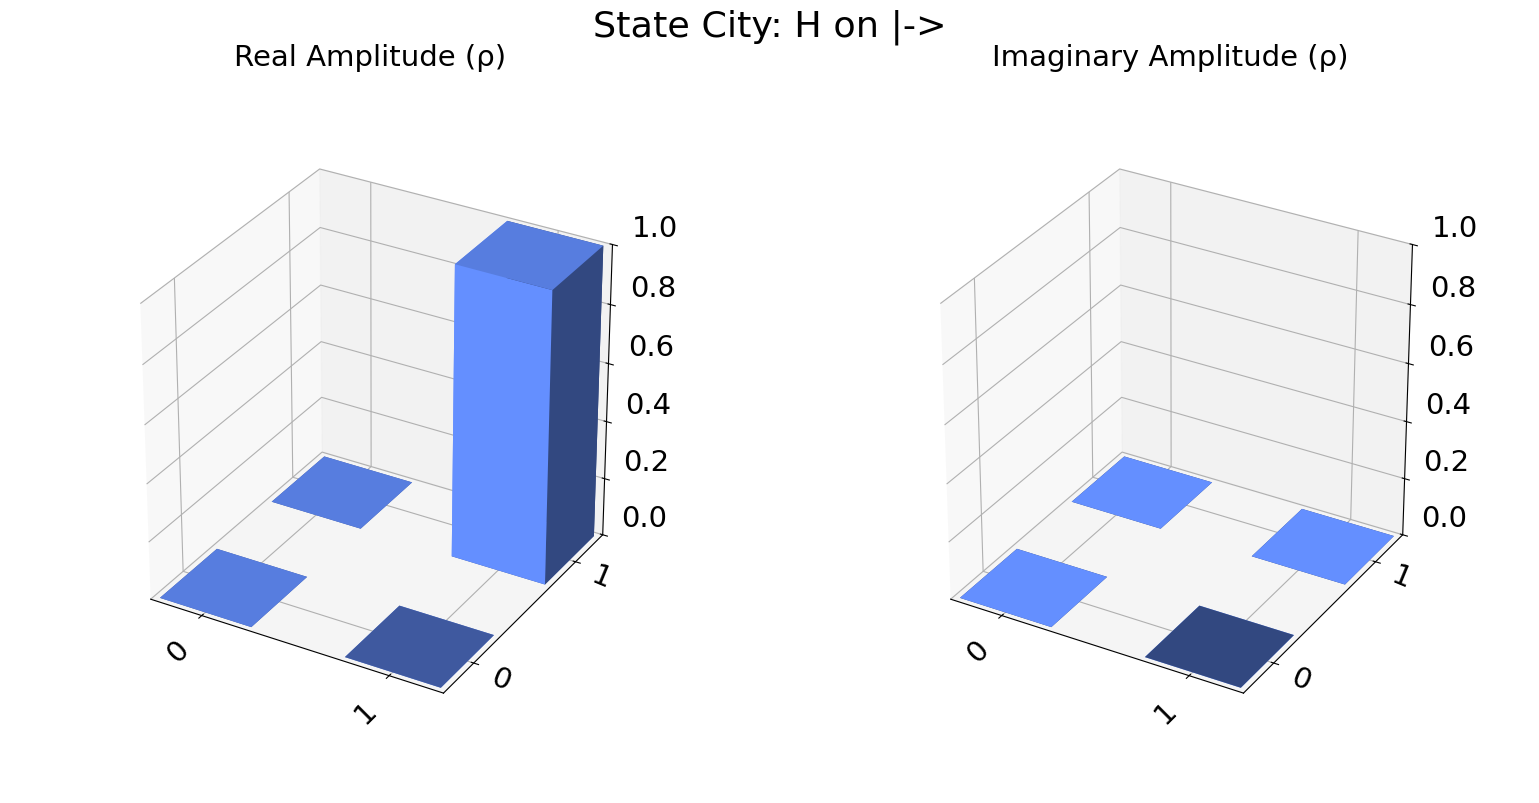

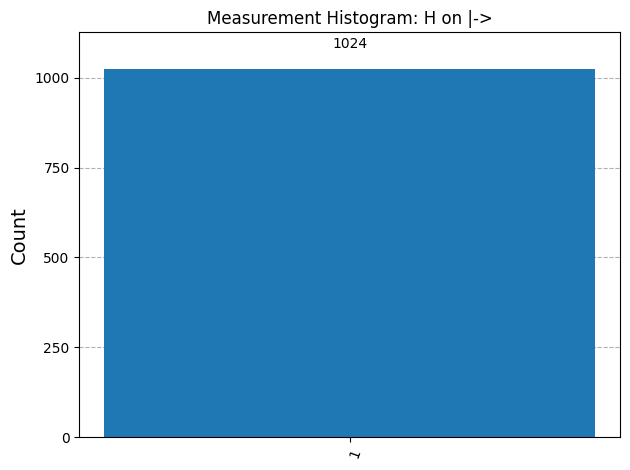

In [21]:
import numpy as np

H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

states = {
    "|0>": np.array([1, 0]),
    "|1>": np.array([0, 1]),
    "|+>": np.array([1/np.sqrt(2), 1/np.sqrt(2)]),
    "|->": np.array([1/np.sqrt(2), -1/np.sqrt(2)])
}

for label, vec in states.items():
    result = H @ vec
    print(f"H {label} = {np.round(result, 3)}")

for label, vec in states.items():
    visualize_hadamard(vec, label)


In [ ]:
# Task 2 :

Statevector: [0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j
 0.354+0.j]


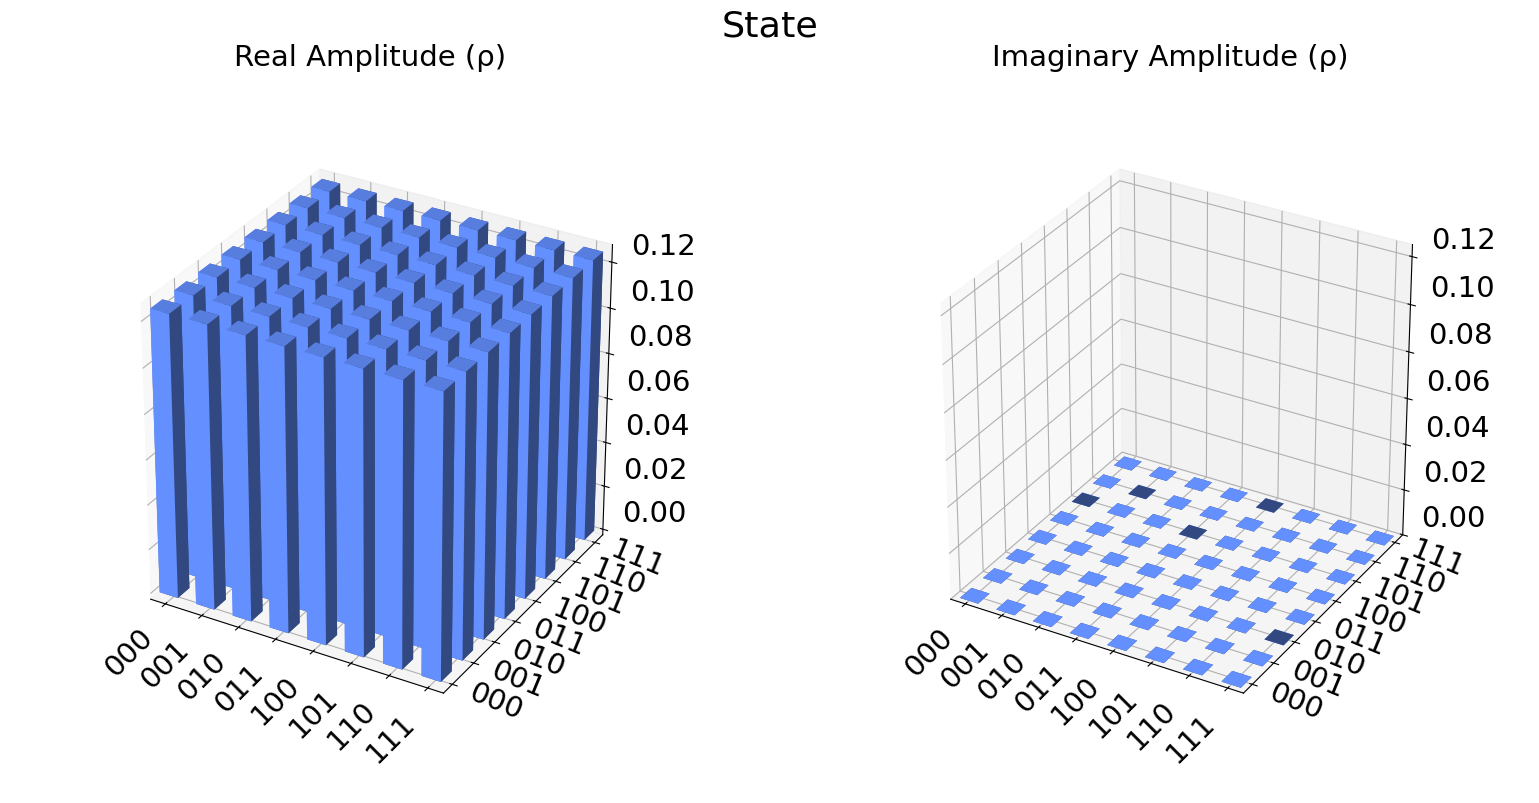

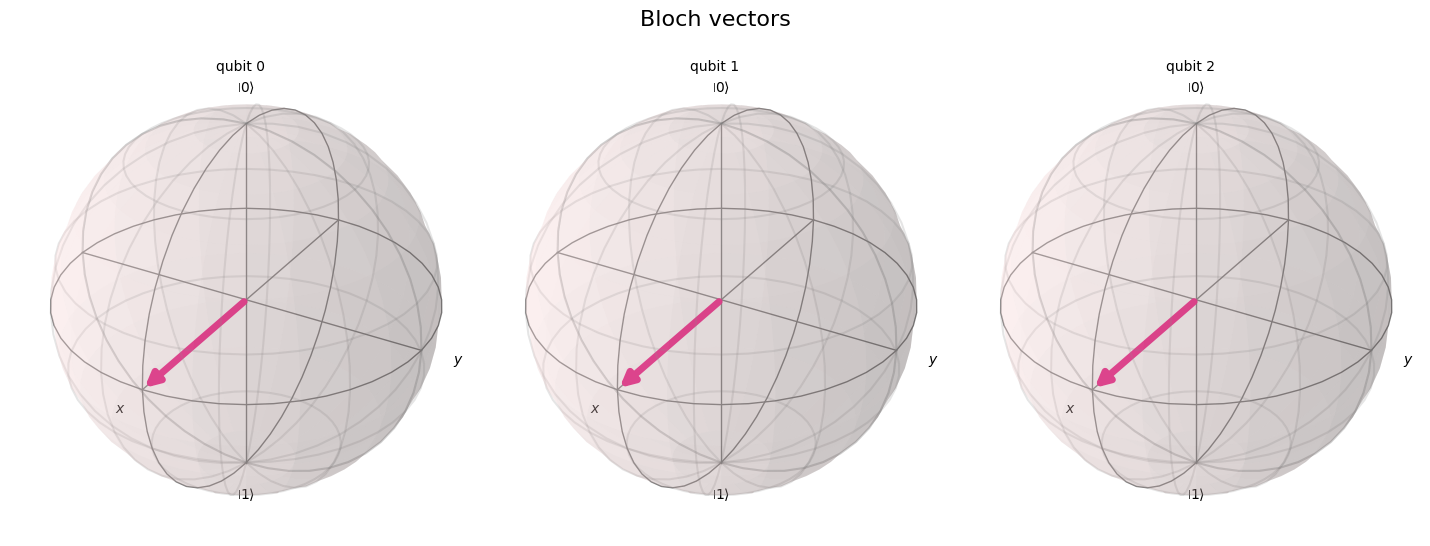

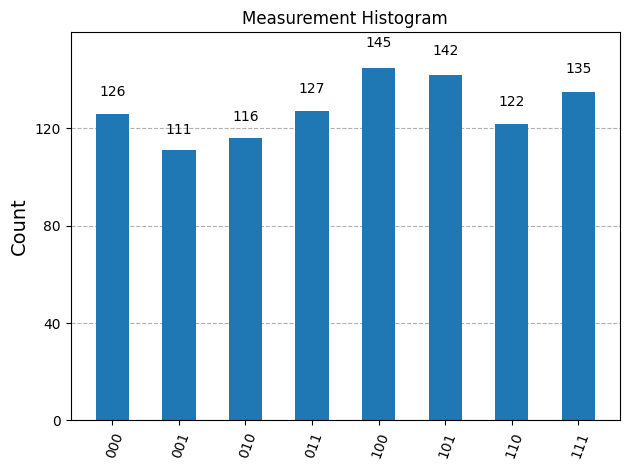

In [20]:
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("Statevector:", np.round(state3.data, 3))

display(plot_state_city(state3, title="State"))
display(plot_bloch_multivector(state3, title="Bloch vectors"))
sim = AerSimulator()
result3 = sim.run(transpile(qc3, sim), shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram"))


In [ ]:
# Task 3

Statevector: [0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


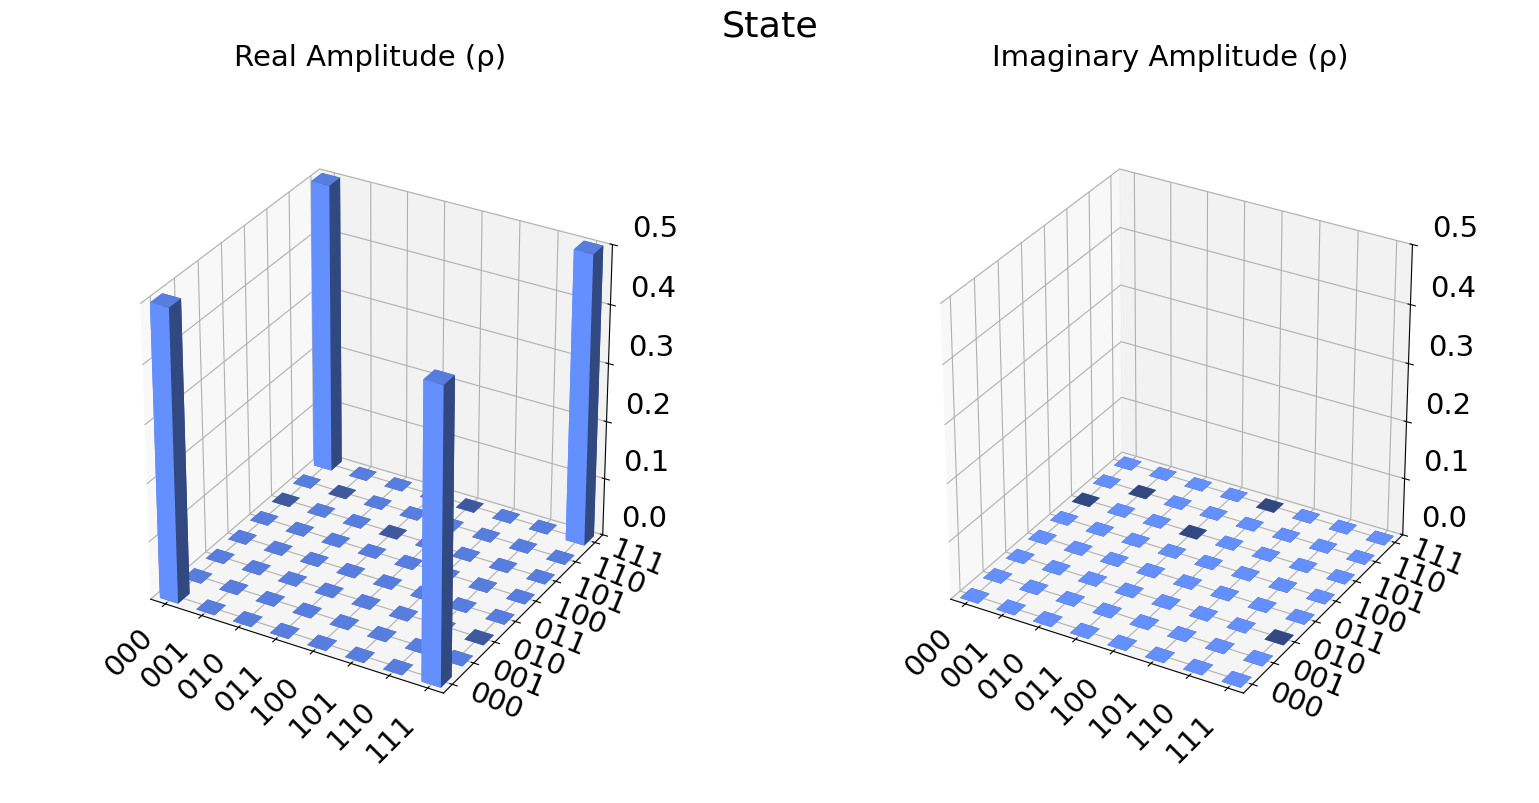

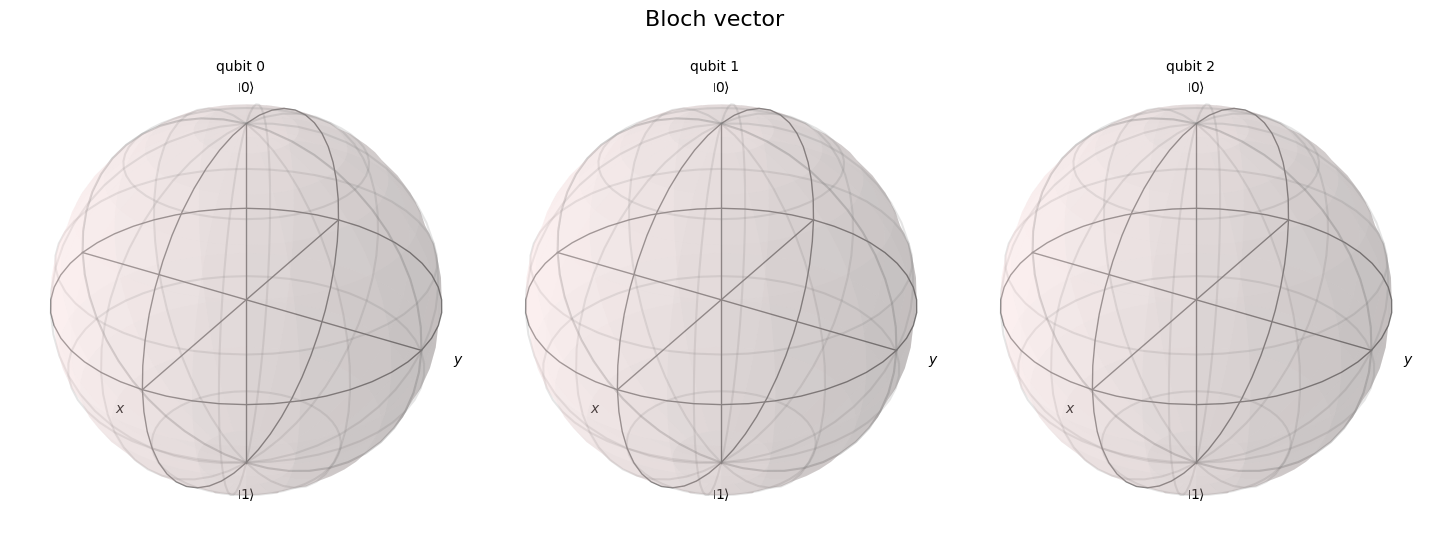

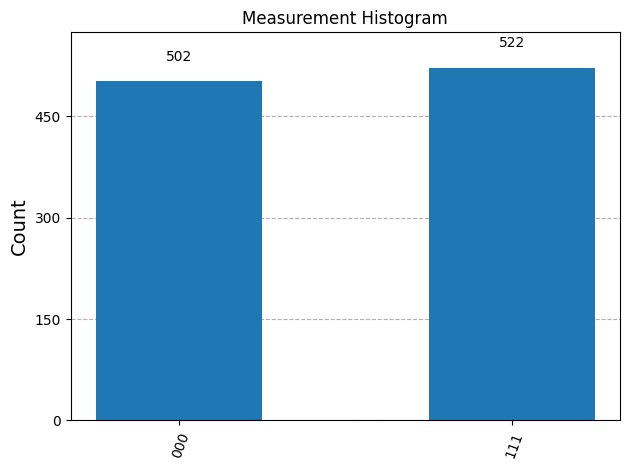

In [19]:
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

qc_ghz_state = QuantumCircuit(3)
qc_ghz_state.h(0)
qc_ghz_state.cx(0, 1)
qc_ghz_state.cx(0, 2)
state_ghz = Statevector.from_instruction(qc_ghz_state)

print("Statevector:", np.round(state_ghz.data, 3))

display(plot_state_city(state_ghz, title="State"))
display(plot_bloch_multivector(state_ghz, title="Bloch vector"))

sim = AerSimulator()
result_ghz = sim.run(transpile(qc_ghz, sim), shots=1024).result()
counts_ghz = result_ghz.get_counts()
display(plot_histogram(counts_ghz, title="Measurement Histogram"))



In [ ]:
# Task 4

In [18]:
qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)
qc_h2.h(0)
qc_h2.h(0)
state_after = Statevector.from_instruction(qc_h2)

print("Statevector after H•H on |1>:", np.round(state_after.data, 3))
print("Original |1> =", [0, 1])


Statevector after H•H on |1>: [0.+0.j 1.+0.j]
Original |1> = [0, 1]


In [ ]:
# Task 5

H on |0>:
--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


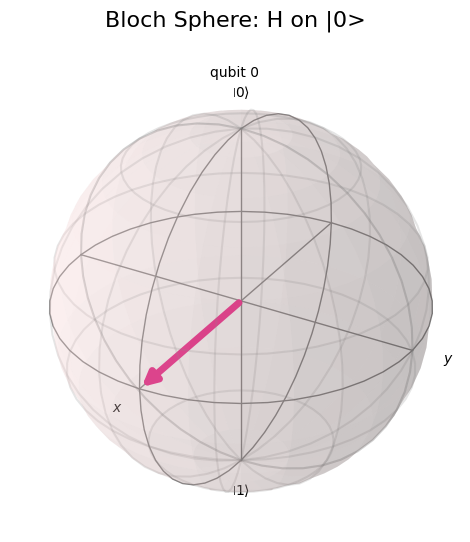

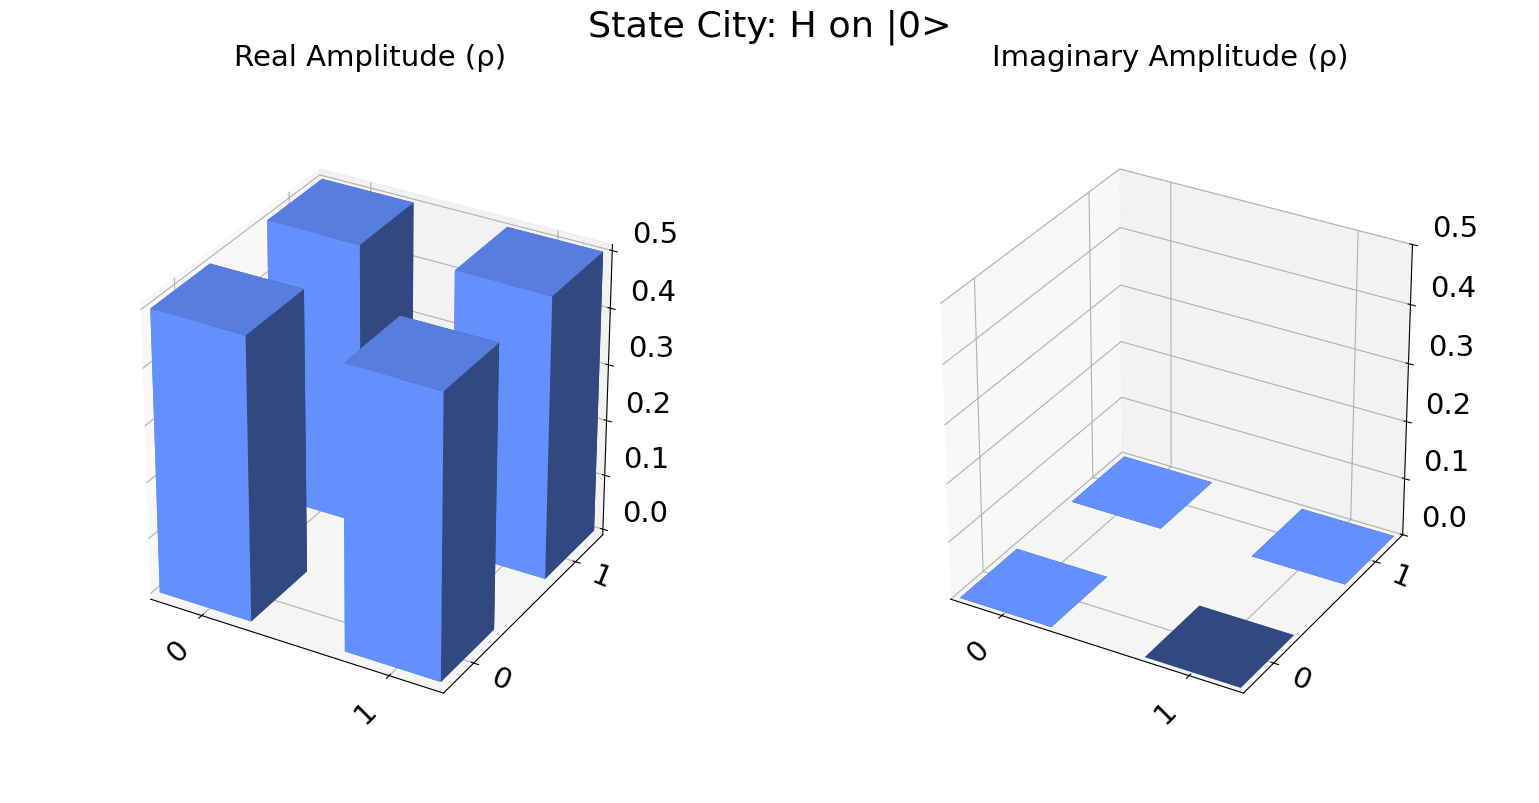

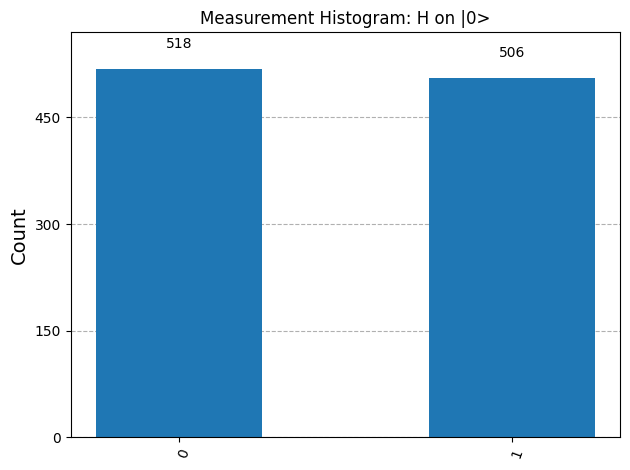



H on |1>:
--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


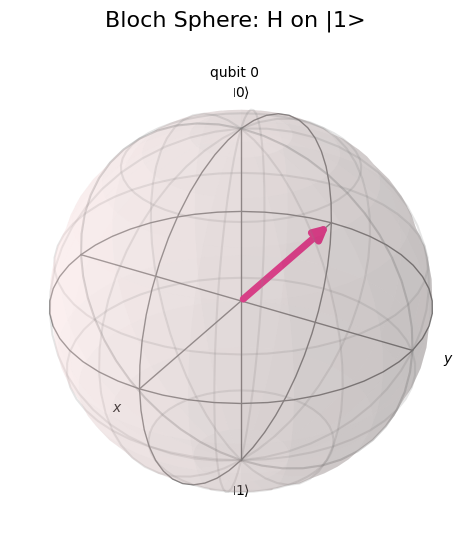

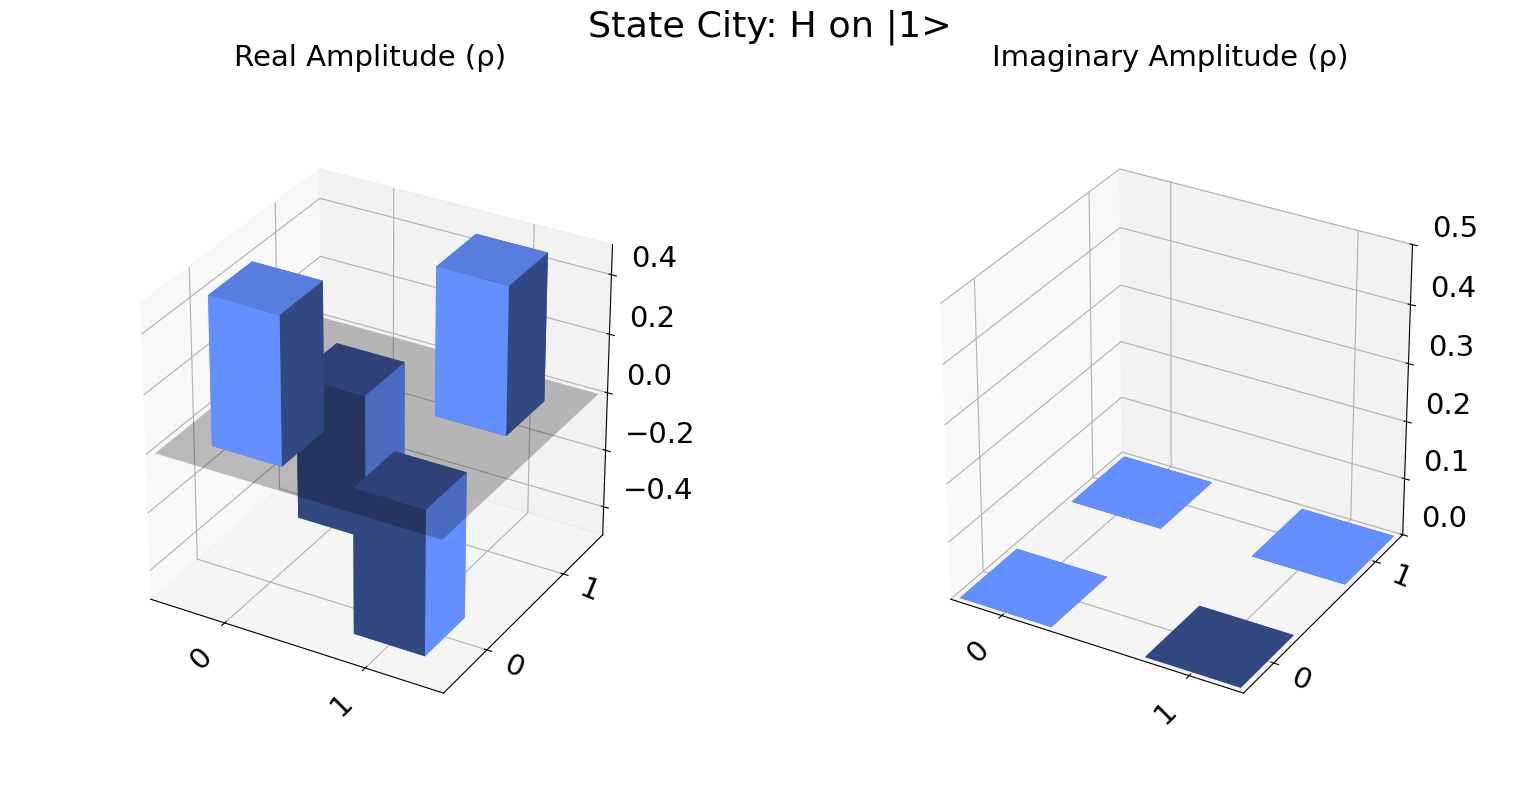

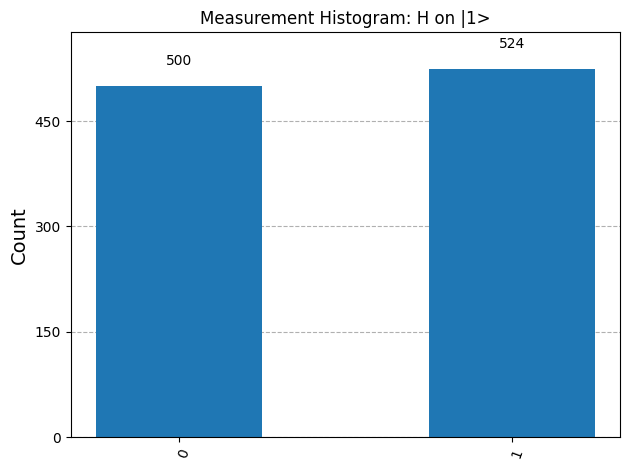



H on |+>:
--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


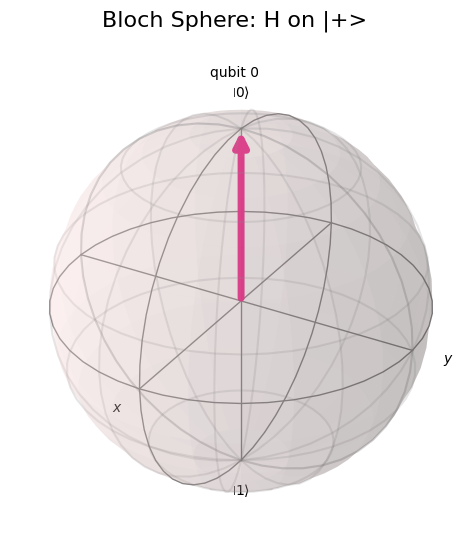

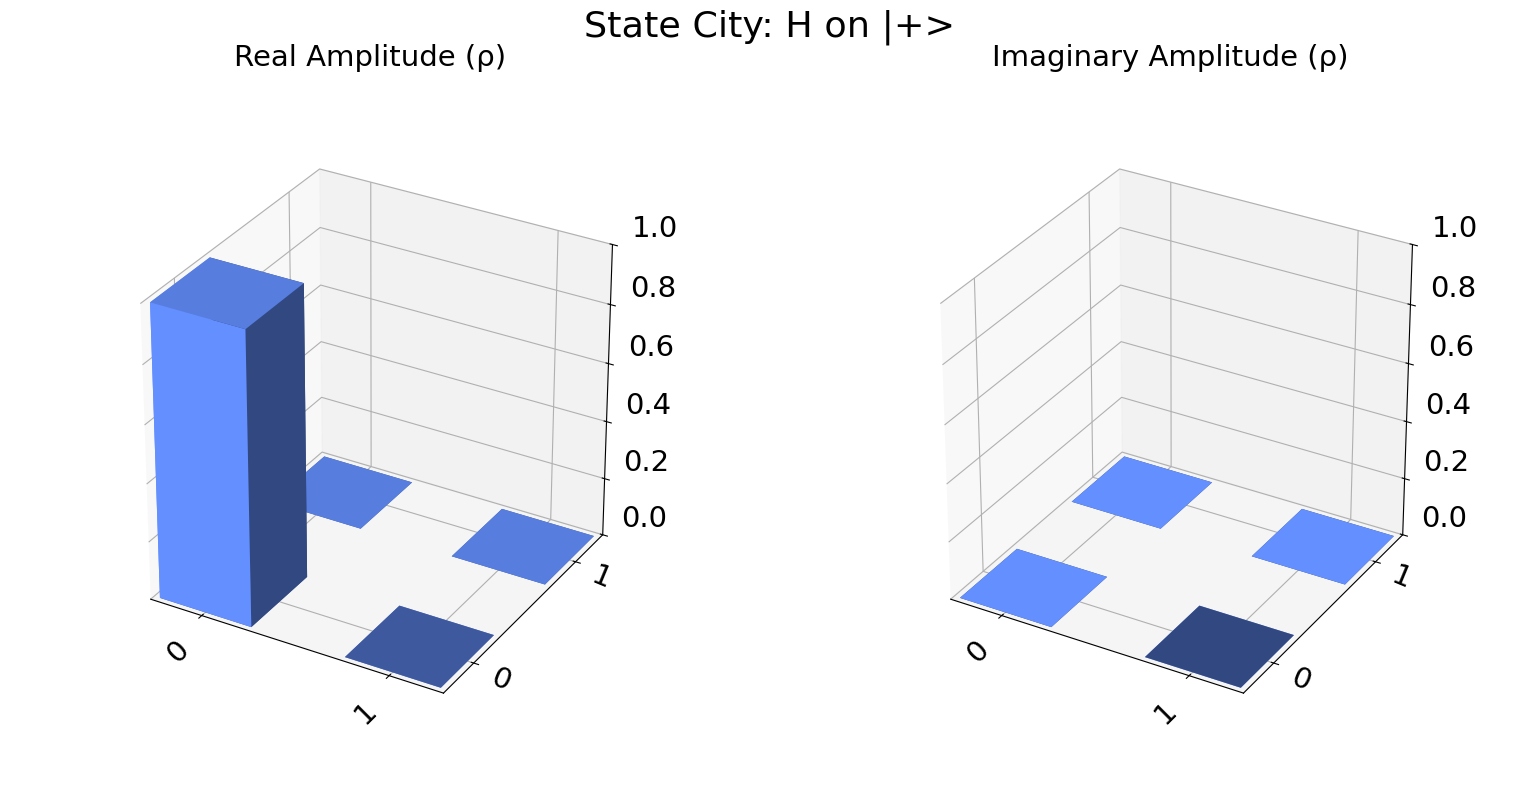

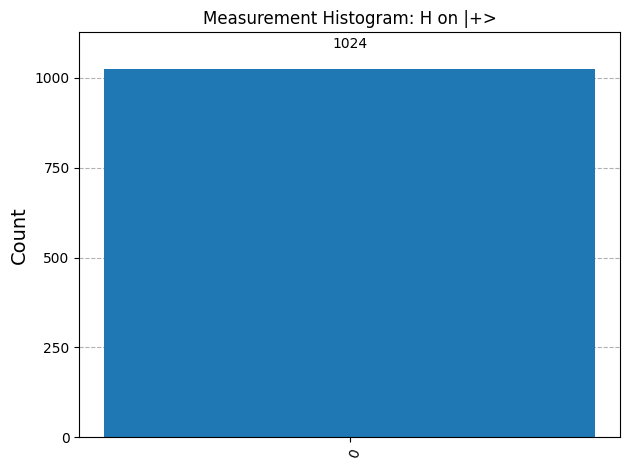



H on |->:
--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


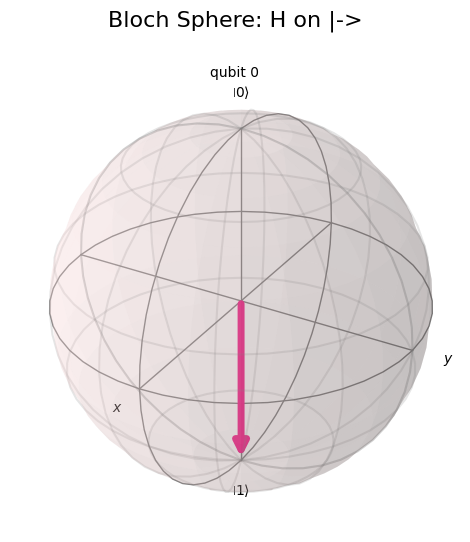

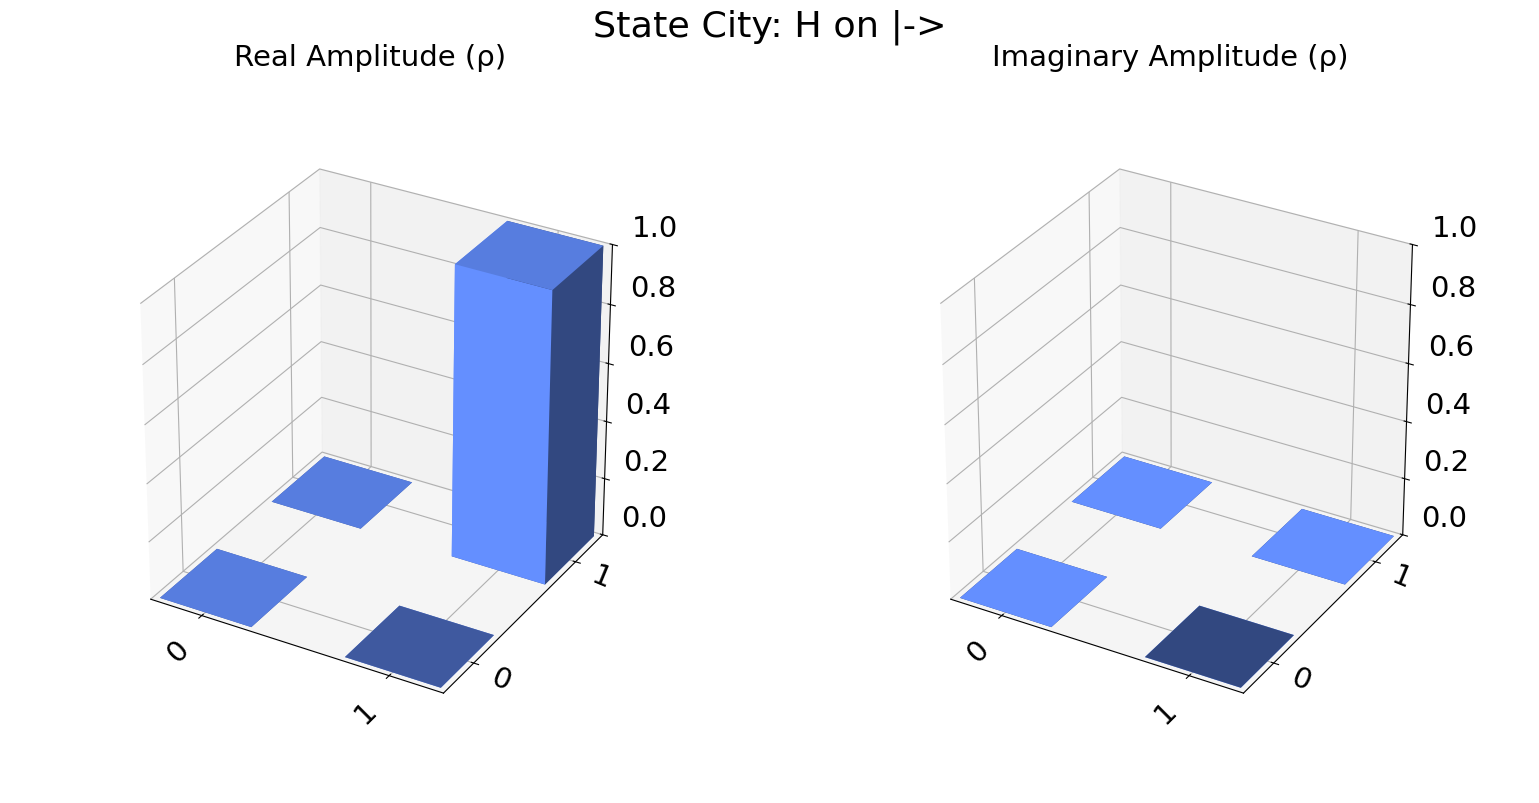

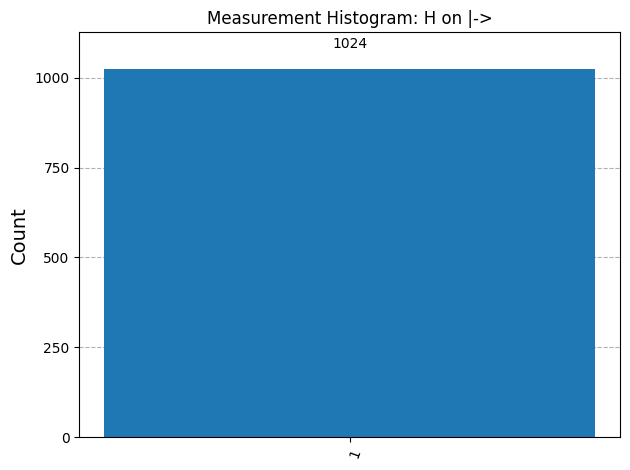

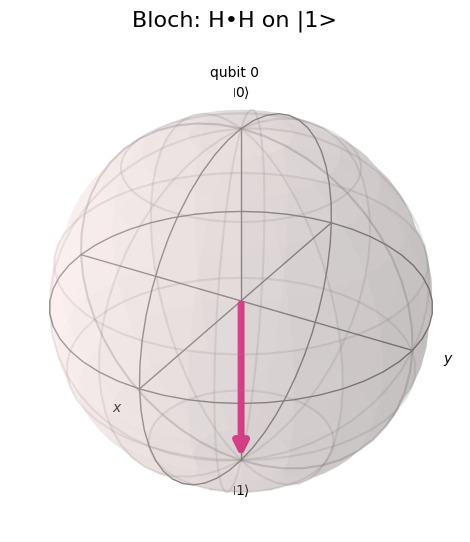

In [17]:
print("H on |0>:")
visualize_hadamard(np.array([1, 0]), "|0>")

print("H on |1>:")
visualize_hadamard(np.array([0, 1]), "|1>")

print("H on |+>:")
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

print("H on |->:")
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")

from qiskit.visualization import plot_bloch_multivector
qc_double = QuantumCircuit(1)
qc_double.initialize([0, 1], 0)
qc_double.h(0)
qc_double.h(0)
state_double = Statevector.from_instruction(qc_double)
display(plot_bloch_multivector(state_double, title="Bloch: H•H on |1>"))
